# Project Goal:

## Imports

In [107]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [108]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Data Preprocessing

The original dataset has over 1 million rows. At this time, in order to get a working model with a lower runtime, I only bring in the first 10,000 rows.

In [109]:
df = pd.read_csv('/content/drive/MyDrive/Motor_Vehicle_Collisions_-_Crashes.csv', nrows=10000)

In [110]:
# Looking at the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   CRASH DATE                     10000 non-null  object 
 1   CRASH TIME                     10000 non-null  object 
 2   BOROUGH                        6558 non-null   object 
 3   ZIP CODE                       6555 non-null   float64
 4   LATITUDE                       9174 non-null   float64
 5   LONGITUDE                      9174 non-null   float64
 6   LOCATION                       9174 non-null   object 
 7   ON STREET NAME                 7324 non-null   object 
 8   CROSS STREET NAME              4655 non-null   object 
 9   OFF STREET NAME                2676 non-null   object 
 10  NUMBER OF PERSONS INJURED      10000 non-null  int64  
 11  NUMBER OF PERSONS KILLED       10000 non-null  int64  
 12  NUMBER OF PEDESTRIANS INJURED  10000 non-null  

In [111]:
# Looking at the first 5 rows of the dataset
df.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/11/2021,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN
1,03/26/2022,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN
2,06/29/2022,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
3,09/11/2021,9:35,BROOKLYN,11208.0,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,...,NaN,NaN,NaN,NaN,4456314,Sedan,NaN,NaN,NaN,NaN
4,12/14/2021,8:13,BROOKLYN,11233.0,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,...,NaN,NaN,NaN,NaN,4486609,NaN,NaN,NaN,NaN,NaN


In [112]:
df.isnull().sum()

CRASH DATE                          0
CRASH TIME                          0
BOROUGH                          3442
ZIP CODE                         3445
LATITUDE                          826
LONGITUDE                         826
LOCATION                          826
ON STREET NAME                   2676
CROSS STREET NAME                5345
OFF STREET NAME                  7324
NUMBER OF PERSONS INJURED           0
NUMBER OF PERSONS KILLED            0
NUMBER OF PEDESTRIANS INJURED       0
NUMBER OF PEDESTRIANS KILLED        0
NUMBER OF CYCLIST INJURED           0
NUMBER OF CYCLIST KILLED            0
NUMBER OF MOTORIST INJURED          0
NUMBER OF MOTORIST KILLED           0
CONTRIBUTING FACTOR VEHICLE 1      46
CONTRIBUTING FACTOR VEHICLE 2    2195
CONTRIBUTING FACTOR VEHICLE 3    8954
CONTRIBUTING FACTOR VEHICLE 4    9728
CONTRIBUTING FACTOR VEHICLE 5    9921
COLLISION_ID                        0
VEHICLE TYPE CODE 1               112
VEHICLE TYPE CODE 2              3286
VEHICLE TYPE

In terms of dropping columns:
- I dropped **Latitude and Longitude** because that information was already stored in 'Location'; it would be redundant to have all three columns.
- **Contributing Factors 3-5** were dropped because they have higher null values. I also want to focus on 2 vehicle accidents.
- **Vehicle Types 3-5** were dropped for the same reason.
- After looking closer into 'Number of Persons Killed/Injured', 'Number of Pedestrians Injured/Killed', 'Number of Cyclist Killed/Injured' and 'Number of Motorists Injured/Killed' I noticed that if a pedestrian, cyclist, or motorist were injured/killed, it would count as person injured/killed. Therefore, I dropped **Number of Pedestrians Injured/Killed**, **Number of Cyclist Killed/Injured** and **Number of Motorists Injured/Killed** as it would be redundant to have those columns. Having only the 'Persons Injured/Killed' will suffice. It just won't specify if that person was a pedestrian, cyclist, or motorist.

In [113]:
# dropping CONTRIBUTING FACTOR VEHICLE 3-5 and the types of person/motorist injured/killed
df.drop(columns=['CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5', 'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5', 'NUMBER OF PEDESTRIANS INJURED','NUMBER OF PEDESTRIANS KILLED','NUMBER OF CYCLIST INJURED','NUMBER OF CYCLIST KILLED','NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED', 'LATITUDE', 'LONGITUDE'], inplace=True)

In [114]:
# looking at the new dataframe with less columns.
df.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2
0,09/11/2021,2:39,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,2,0,Aggressive Driving/Road Rage,Unspecified,4455765,Sedan,Sedan
1,03/26/2022,11:45,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,1,0,Pavement Slippery,NaN,4513547,Sedan,NaN
2,06/29/2022,6:55,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,0,0,Following Too Closely,Unspecified,4541903,Sedan,Pick-up Truck
3,09/11/2021,9:35,BROOKLYN,11208.0,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,0,0,Unspecified,NaN,4456314,Sedan,NaN
4,12/14/2021,8:13,BROOKLYN,11233.0,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,0,0,NaN,NaN,4486609,NaN,NaN


In [115]:
df.isnull().sum()

CRASH DATE                          0
CRASH TIME                          0
BOROUGH                          3442
ZIP CODE                         3445
LOCATION                          826
ON STREET NAME                   2676
CROSS STREET NAME                5345
OFF STREET NAME                  7324
NUMBER OF PERSONS INJURED           0
NUMBER OF PERSONS KILLED            0
CONTRIBUTING FACTOR VEHICLE 1      46
CONTRIBUTING FACTOR VEHICLE 2    2195
COLLISION_ID                        0
VEHICLE TYPE CODE 1               112
VEHICLE TYPE CODE 2              3286
dtype: int64

In [116]:
# converting null values in zipcode to int
df['ZIP CODE'] = df['ZIP CODE'].fillna(0).astype(int)

# converting date column from object to date
df['CRASH DATE'] = pd.to_datetime(df['CRASH DATE'])

# converting time column from object to time
df['CRASH TIME'] = pd.to_datetime(df['CRASH TIME'], format='%H:%S').dt.time

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   CRASH DATE                     10000 non-null  datetime64[ns]
 1   CRASH TIME                     10000 non-null  object        
 2   BOROUGH                        6558 non-null   object        
 3   ZIP CODE                       10000 non-null  int64         
 4   LOCATION                       9174 non-null   object        
 5   ON STREET NAME                 7324 non-null   object        
 6   CROSS STREET NAME              4655 non-null   object        
 7   OFF STREET NAME                2676 non-null   object        
 8   NUMBER OF PERSONS INJURED      10000 non-null  int64         
 9   NUMBER OF PERSONS KILLED       10000 non-null  int64         
 10  CONTRIBUTING FACTOR VEHICLE 1  9954 non-null   object        
 11  CONTRIBUTING FAC

## Exploratory Data Analysis

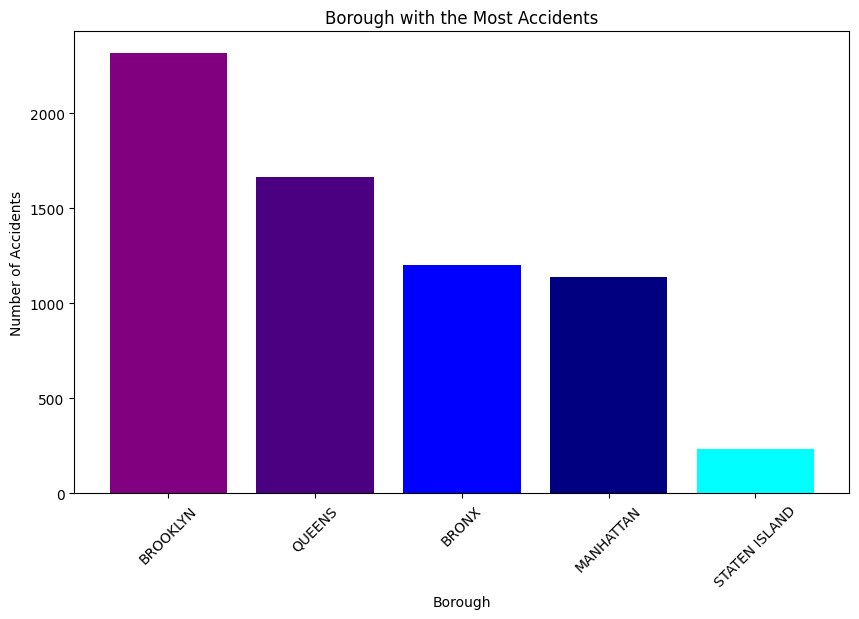

In [127]:
# Grouping by borough and counting the number of accidents in each borough
borough_counts = df['BOROUGH'].value_counts()

# Creating a bar chart to visualize the borough with the most accidents
plt.figure(figsize=(10, 6))
plt.bar(borough_counts.index, borough_counts.values, color=['#800080', '#4B0082', '#0000FF', '#000080', '#00FFFF'])
plt.xlabel('Borough')
plt.ylabel('Number of Accidents')
plt.title('Borough with the Most Accidents')
plt.xticks(rotation=45)
plt.show()

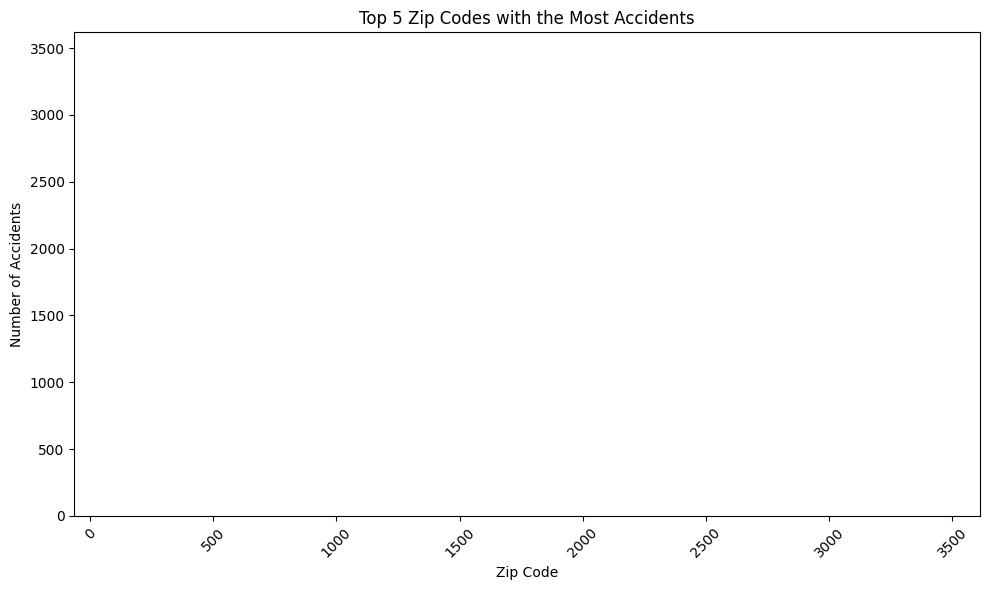

In [134]:
zip_code_counts = df['ZIP CODE'].value_counts(dropna=False).head(5)

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(zip_code_counts.values, zip_code_counts.values, color=['#006400', '#008000', '#008B8B', '#00FFFF', '#00FF00'])
plt.xlabel('Zip Code')
plt.ylabel('Number of Accidents')
plt.title('Top 5 Zip Codes with the Most Accidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()